In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Lucas\\Video Images\\Data\\NoNone_Compare_withnegdist.csv")
df4 = pd.read_csv("C:\\Users\\Lucas\\Video Images\\Data\\NoNone_Compare_withdist.csv")

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,imageFile,textFile,Step,Localization,Distance
0,151,151,GH010020@t=92.000.jpg,GH010020@t=92.000.txt,Surgery,upper_left/lower,-0.113922
1,152,152,GH010020@t=92.067.jpg,GH010020@t=92.067.txt,Surgery,upper_left/lower,-0.118056
2,153,153,GH010020@t=92.133.jpg,GH010020@t=92.133.txt,Surgery,upper_left/lower,-0.116678
3,154,154,GH010020@t=92.200.jpg,GH010020@t=92.200.txt,Surgery,upper_left/lower,-0.111443
4,155,155,GH010020@t=92.267.jpg,GH010020@t=92.267.txt,Surgery,upper_left/lower,-0.109807


In [4]:
df["Distance"].describe()

count    18802.000000
mean         0.042688
std          0.100567
min         -0.395939
25%         -0.012006
50%          0.015231
75%          0.036165
max          0.682603
Name: Distance, dtype: float64

In [5]:
pd.qcut(df["Distance"], q=4)

0        (-0.397, -0.012]
1        (-0.397, -0.012]
2        (-0.397, -0.012]
3        (-0.397, -0.012]
4        (-0.397, -0.012]
               ...       
18797     (0.0362, 0.683]
18798     (0.0362, 0.683]
18799     (0.0362, 0.683]
18800     (0.0362, 0.683]
18801     (0.0362, 0.683]
Name: Distance, Length: 18802, dtype: category
Categories (4, interval[float64, right]): [(-0.397, -0.012] < (-0.012, 0.0152] < (0.0152, 0.0362] < (0.0362, 0.683]]

array([[<AxesSubplot:title={'center':'Left'}>,
        <AxesSubplot:title={'center':'Posterior'}>],
       [<AxesSubplot:title={'center':'Right'}>,
        <AxesSubplot:title={'center':'Surgery'}>]], dtype=object)

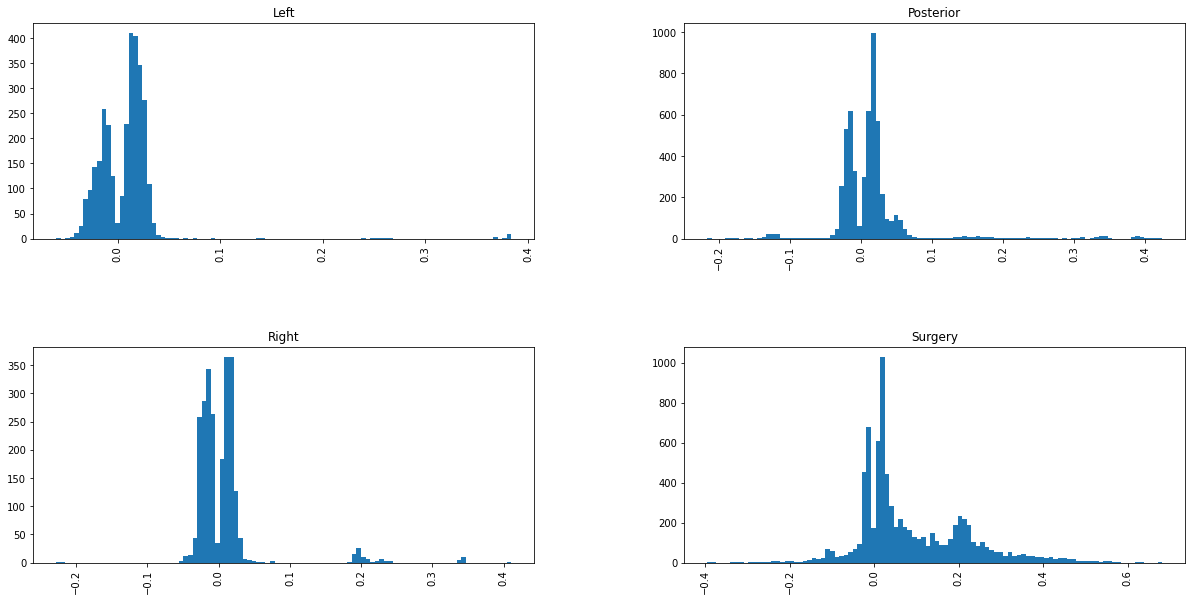

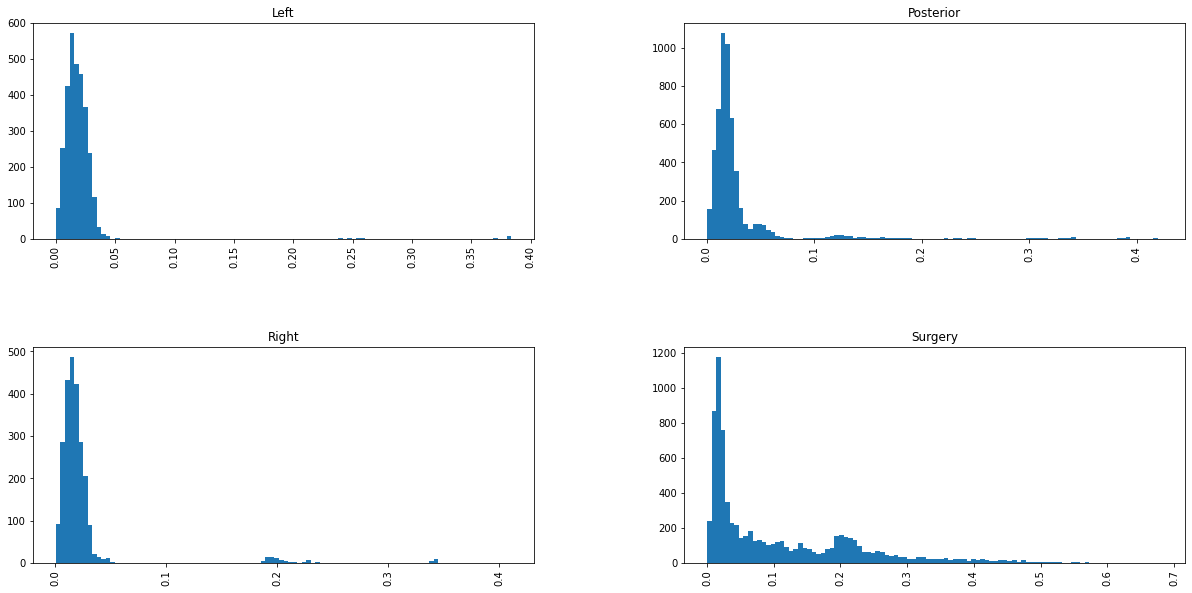

In [6]:
df.hist(column="Distance", by="Step", bins=100, figsize=(20, 10))
df4.hist(column="Distance", by="Step", bins=100, figsize=(20, 10))

In [7]:
left = df[(df.Step == "Left")]
right = df[df.Step == "Right"]
post = df[df.Step == "Posterior"]
surg = df[df.Step == "Surgery"]

In [8]:
left["Distance"].describe()

count    3089.000000
mean        0.007856
std         0.033719
min        -0.059950
25%        -0.011260
50%         0.011845
75%         0.020187
max         0.383604
Name: Distance, dtype: float64

In [9]:
right["Distance"].describe()

count    2449.000000
mean        0.005298
std         0.047841
min        -0.228426
25%        -0.017678
50%        -0.004793
75%         0.014909
max         0.410619
Name: Distance, dtype: float64

In [10]:
post["Distance"].describe()

count    5341.000000
mean        0.014057
std         0.058802
min        -0.216872
25%        -0.014793
50%         0.011970
75%         0.021393
max         0.423942
Name: Distance, dtype: float64

In [11]:
surg["Distance"].describe()

count    7923.000000
mean        0.087127
std         0.130723
min        -0.395939
25%         0.006169
50%         0.034717
75%         0.180707
max         0.682603
Name: Distance, dtype: float64

In [12]:
df.loc[(df["Step"] == "Left") | (df["Step"] == "Right") | (df["Step"] == "Posterior"), 'Contact'] = 1
df.loc[(df["Step"] == "Surgery"), 'Contact'] = 0
df4.loc[(df["Step"] == "Left") | (df["Step"] == "Right") | (df["Step"] == "Posterior"), 'Contact'] = 1
df4.loc[(df["Step"] == "Surgery"), 'Contact'] = 0

In [13]:
df.head()

,Unnamed: 0.1,Unnamed: 0,imageFile,textFile,Step,Localization,Distance,Contact
0,151,151,GH010020@t=92.000.jpg,GH010020@t=92.000.txt,Surgery,upper_left/lower,-0.113922,0.0
1,152,152,GH010020@t=92.067.jpg,GH010020@t=92.067.txt,Surgery,upper_left/lower,-0.118056,0.0
2,153,153,GH010020@t=92.133.jpg,GH010020@t=92.133.txt,Surgery,upper_left/lower,-0.116678,0.0
3,154,154,GH010020@t=92.200.jpg,GH010020@t=92.200.txt,Surgery,upper_left/lower,-0.111443,0.0
4,155,155,GH010020@t=92.267.jpg,GH010020@t=92.267.txt,Surgery,upper_left/lower,-0.109807,0.0


In [14]:
df['Prediction'] = df['Distance'].apply(lambda x: 1 if x < 0.05 else 0)

In [15]:
df["Contact"].describe()

count    18802.000000
mean         0.578609
std          0.493795
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Contact, dtype: float64

In [16]:
df["Prediction"].describe()

count    18802.000000
mean         0.779438
std          0.414636
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Prediction, dtype: float64

In [17]:
df['Surgery'] = df['Step'].apply(lambda x: 1 if x == "Surgery" else 0)
df['Left'] = df['Step'].apply(lambda x: 1 if x == "Left" else 0)
df['Right'] = df['Step'].apply(lambda x: 1 if x == "Right" else 0)
df['Posterior'] = df['Step'].apply(lambda x: 1 if x == "Posterior" else 0)

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import sklearn

In [19]:
#define the predictor variables and the response variable
X = df[['Distance']]
y = df['Contact']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression(class_weight='balanced')

#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

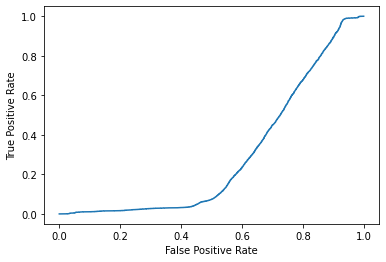

In [107]:
#define metrics
y_pred_proba = log_regression.predict_proba(X)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y, X)
y_pred = log_regression.predict(X)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
#define the predictor variables and the response variable
X2 = df4[['Distance']]
y2 = df4['Contact']

#split the dataset into training (70%) and testing (30%) sets
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.3,random_state=0) 

#instantiate the model
log_regression2 = LogisticRegression(class_weight='balanced')

#fit the model using the training data
log_regression2.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

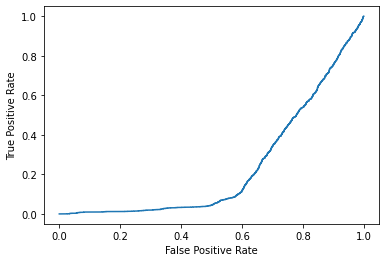

In [22]:
#define metrics
y_pred_proba2 = log_regression.predict_proba(X_test2)[::,1]
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test2, X_test2)
y_pred2 = log_regression.predict(X_test2)

#create ROC curve
plt.plot(fpr2,tpr2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [108]:

import numpy
print("optimal threshold: " + str(thresholds[np.argmax(tpr - fpr)]))
gmeans = tpr*(1-fpr)
idx = numpy.argmax(gmeans)
optimal_threshold = thresholds[idx]
print(optimal_threshold)

optimal threshold: -0.0355424838731411
0.00106475102254


In [24]:
import numpy
print("optimal threshold: " + str(thresholds2[np.argmax(tpr2 - fpr2)]))
gmeans2 = tpr2*(1-fpr2)
idx2 = numpy.argmax(gmeans2)
optimal_threshold2 = thresholds2[idx2]
print(optimal_threshold2)

optimal threshold: 0.0003910000287722
0.0180719054681569


f1 score: 0.8148837209302326
accuracy score: 0.7530579684453111


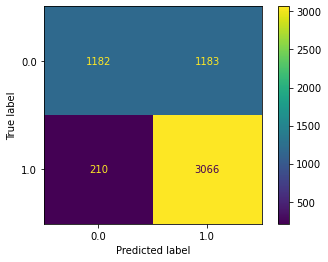

In [25]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
print("f1 score: " + str(metrics.f1_score(y_test, y_pred)))
print("accuracy score: " + str(metrics.accuracy_score(y_test, y_pred)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_regression.classes_)
disp.plot()
plt.show()

f1 score: 0.8218320402885532
accuracy score: 0.7679489452224783


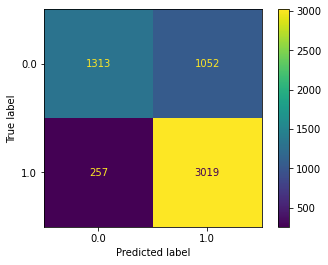

In [26]:
cm2 = sklearn.metrics.confusion_matrix(y_test2, y_pred2)
print("f1 score: " + str(metrics.f1_score(y_test2, y_pred2)))
print("accuracy score: " + str(metrics.accuracy_score(y_test2, y_pred2)))
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=log_regression2.classes_)
disp2.plot()
plt.show()

f1 score: 0.8095088901073079
precision score: 0.7052200614124872
recall score: 0.9499954039893372


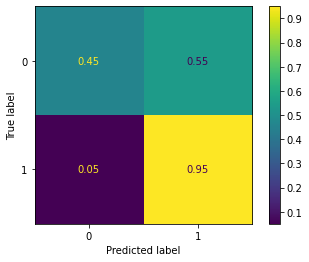

In [115]:
thr = 0.05
df['thrTest'] = df['Distance'].apply(lambda x: 1 if x <= thr else 0)
print("f1 score: " + str(metrics.f1_score(df['Contact'], df['thrTest'])))
print("precision score: " + str(metrics.precision_score(df['Contact'], df['thrTest'])))
print("recall score: " + str(metrics.recall_score(df['Contact'], df['thrTest'])))
cm2 = sklearn.metrics.confusion_matrix(df['Contact'], df['thrTest'], normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()

f1 score: 0.6994693680656054
precision score: 0.6994693680656054
recall score: 0.39985292765879216


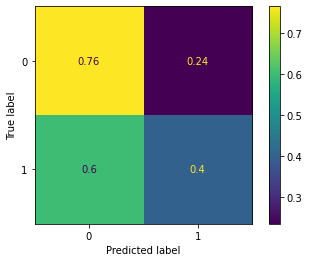

In [110]:
thr = 0
df['thrTest'] = df['Distance'].apply(lambda x: 1 if x <= thr else 0)
print("f1 score: " + str(metrics.precision_score(df['Contact'], df['thrTest'])))
print("precision score: " + str(metrics.precision_score(df['Contact'], df['thrTest'])))
print("recall score: " + str(metrics.recall_score(df['Contact'], df['thrTest'])))
cm2 = sklearn.metrics.confusion_matrix(df['Contact'], df['thrTest'], normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()

optimal: 0.06
f1 score: 0.8107250638396657
precision score: 0.7000066813656711
recall score: 0.9630480742715323


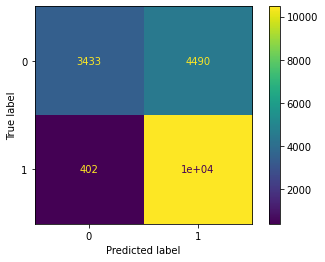

In [93]:
optimal = 0
best = -1
for thr in range(-100, 100):
    thr *= 0.01
    df['thrTest'] = df['Distance'].apply(lambda x: 1 if x <= thr else 0)
    f1 = metrics.f1_score(df['Contact'], df['thrTest'])
    if f1 >= best:
        optimal = thr
        best = f1
print("optimal: " + str(optimal))
df['thrTest'] = df['Distance'].apply(lambda x: 1 if x <= optimal else 0)
print("f1 score: " + str(metrics.f1_score(df['Contact'], df['thrTest'])))
print("precision score: " + str(metrics.precision_score(df['Contact'], df['thrTest'])))
print("recall score: " + str(metrics.recall_score(df['Contact'], df['thrTest'])))
cm2 = sklearn.metrics.confusion_matrix(df['Contact'], df['thrTest'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()

In [87]:
df4.head()

,Unnamed: 0.1,Unnamed: 0,imageFile,textFile,Step,Localization,Distance,Contact,thrTest
0,151,151,GH010020@t=92.000.jpg,GH010020@t=92.000.txt,Surgery,upper_left/lower,0.113922,0.0,0
1,152,152,GH010020@t=92.067.jpg,GH010020@t=92.067.txt,Surgery,upper_left/lower,0.118056,0.0,0
2,153,153,GH010020@t=92.133.jpg,GH010020@t=92.133.txt,Surgery,upper_left/lower,0.116678,0.0,0
3,154,154,GH010020@t=92.200.jpg,GH010020@t=92.200.txt,Surgery,upper_left/lower,0.111443,0.0,0
4,155,155,GH010020@t=92.267.jpg,GH010020@t=92.267.txt,Surgery,upper_left/lower,0.109807,0.0,0


optimal: 0.06
f1 score: 0.8183324130314744
precision score: 0.7166839378238342
recall score: 0.9535802923062782


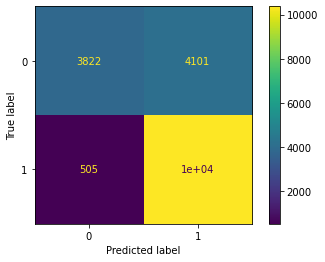

In [96]:
optimal = 0
best = -1
for thr in range(0, 100):
    thr *= 0.01
    if thr == 0:
        continue
    df4['thrTest'] = df4['Distance'].apply(lambda x: 1 if x <= thr else 0)
    f1 = metrics.f1_score(df4['Contact'], df4['thrTest'])
    if f1 >= best:
        optimal = thr
        best = f1
print("optimal: " + str(optimal))
df4['thrTest'] = df4['Distance'].apply(lambda x: 1 if x <= optimal else 0)
print("f1 score: " + str(metrics.f1_score(df4['Contact'], df4['thrTest'])))
print("precision score: " + str(metrics.precision_score(df4['Contact'], df4['thrTest'])))
print("recall score: " + str(metrics.recall_score(df4['Contact'], df4['thrTest'])))
cm2 = sklearn.metrics.confusion_matrix(df4['Contact'], df4['thrTest'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()

In [89]:
df.head()

,Unnamed: 0.1,Unnamed: 0,imageFile,textFile,Step,Localization,Distance,Contact,Prediction,Surgery,Left,Right,Posterior,thrTest
0,151,151,GH010020@t=92.000.jpg,GH010020@t=92.000.txt,Surgery,upper_left/lower,-0.113922,0.0,1,1,0,0,0,1
1,152,152,GH010020@t=92.067.jpg,GH010020@t=92.067.txt,Surgery,upper_left/lower,-0.118056,0.0,1,1,0,0,0,1
2,153,153,GH010020@t=92.133.jpg,GH010020@t=92.133.txt,Surgery,upper_left/lower,-0.116678,0.0,1,1,0,0,0,1
3,154,154,GH010020@t=92.200.jpg,GH010020@t=92.200.txt,Surgery,upper_left/lower,-0.111443,0.0,1,1,0,0,0,1
4,155,155,GH010020@t=92.267.jpg,GH010020@t=92.267.txt,Surgery,upper_left/lower,-0.109807,0.0,1,1,0,0,0,1


In [90]:
df2 = pd.read_csv("C:\\Users\\Lucas\\Video Images\\59_test\\localization_results_withdist.csv")

In [91]:
df2.head()

,file,cautery,resection margin,cautery/resection,distance
0,GH010059@t=5.733.txt,None,None,None/None,None
1,GH010059@t=5.867.txt,None,None,None/None,None
2,GH010059@t=15.000.txt,None,None,None/None,None
3,GH010059@t=15.200.txt,None,None,None/None,None
4,GH010059@t=22.533.txt,None,None,None/None,None


In [92]:
df2['resection margin'].describe()

count     2150
unique       5
top       left
freq       584
Name: resection margin, dtype: object

In [93]:
df2['resection margin'].value_counts()

left     584
upper    494
right    488
None     411
lower    173
Name: resection margin, dtype: int64

In [40]:
df2 = pd.read_csv(r"C:\Users\Lucas\OneDrive - Queen's University\Summer Research 2022\Data analysis\Nodular_BCC_Day13_23March2021_ClinicalCase082_data.csv")

In [95]:
df2.describe()

,Start scan,End scan,Sum.,100.00000,100.10000,100.20000,100.30000,100.40000,100.50000,100.60000,...,999.00000,999.10000,999.20000,999.30000,999.40000,999.50000,999.60000,999.70000,999.80000,999.90000
count,187.000000,187.000000,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,94.000000,94.000000,4.099059e+06,0.000090,0.000017,0.000019,0.000016,0.000018,0.000017,0.000018,...,0.000017,0.000019,2.359073e-05,0.000029,0.000045,0.000043,0.000051,0.000048,0.000021,0.000016
std,54.126395,54.126395,2.299297e+06,0.000083,0.000005,0.000006,0.000005,0.000006,0.000006,0.000006,...,0.000007,0.000009,1.051209e-05,0.000013,0.000042,0.000039,0.000050,0.000055,0.000009,0.000007
min,1.000000,1.000000,1.785612e+06,0.000009,0.000007,0.000008,0.000006,0.000007,0.000008,0.000007,...,0.000004,0.000001,5.959710e-07,0.000008,0.000009,0.000008,0.000004,0.000004,0.000003,0.000005
25%,47.500000,47.500000,2.256527e+06,0.000023,0.000013,0.000014,0.000013,0.000014,0.000013,0.000014,...,0.000012,0.000012,1.567621e-05,0.000020,0.000023,0.000023,0.000020,0.000016,0.000015,0.000011
50%,94.000000,94.000000,2.710130e+06,0.000066,0.000016,0.000018,0.000016,0.000018,0.000016,0.000017,...,0.000016,0.000017,2.139718e-05,0.000027,0.000032,0.000031,0.000030,0.000024,0.000020,0.000015
75%,140.500000,140.500000,6.112062e+06,0.000131,0.000021,0.000022,0.000020,0.000021,0.000020,0.000022,...,0.000022,0.000025,2.928874e-05,0.000036,0.000047,0.000042,0.000055,0.000057,0.000025,0.000020
max,187.000000,187.000000,1.277740e+07,0.000514,0.000032,0.000039,0.000033,0.000037,0.000040,0.000041,...,0.000039,0.000046,5.743519e-05,0.000087,0.000256,0.000205,0.000277,0.000305,0.000053,0.000043


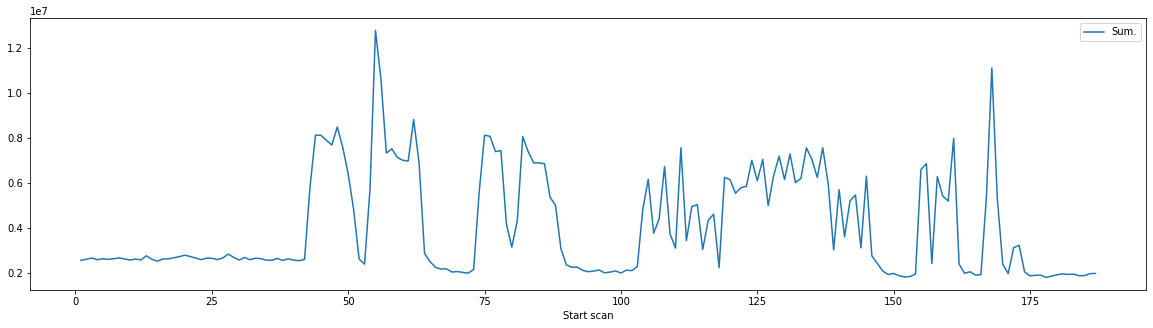

In [76]:
ax = df2.plot(x='Start scan', y='Sum.', figsize=(20, 5))

<AxesSubplot:xlabel='Time', ylabel='avg'>

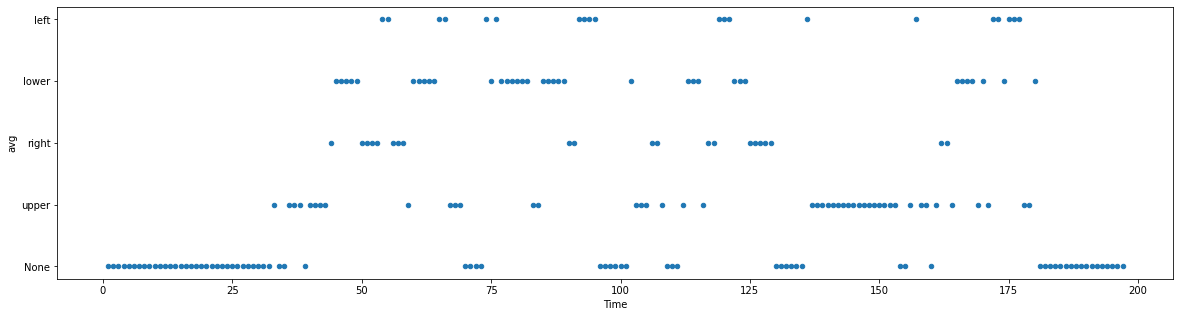

In [83]:
df6.plot.scatter(x='Time', y='avg', figsize=(20, 5))

In [81]:
df6 = pd.read_csv(r"C:\Users\Lucas\Video Images\67_test\localization_results_avg.csv")
df6['Time'] = df6.index+1

<AxesSubplot:xlabel='Time', ylabel='avg'>

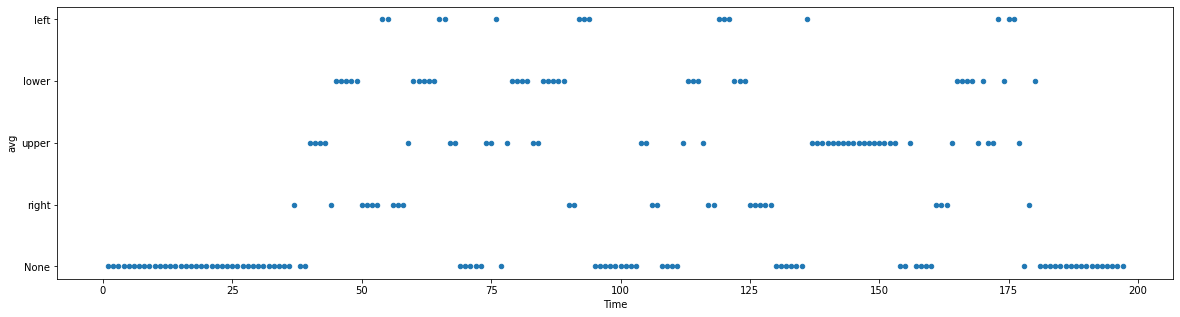

In [100]:
df7.plot.scatter(x='Time', y='avg', figsize=(20, 5))

In [99]:
df7 = pd.read_csv(r"C:\Users\Lucas\Video Images\67_test\localization_results_avg_thr.csv")
df7['Time'] = df7.index+1

In [82]:
df6.head()

,time,avg,Time
0,15,None,1
1,30,None,2
2,45,None,3
3,60,None,4
4,75,None,5


In [49]:
df3 = pd.read_csv(r"C:\Users\Lucas\Video Images\Training\GH010067\GH010067_Labels.csv")

In [50]:
df3.loc[(df["Step"] == "Left") | (df["Step"] == "Right") | (df["Step"] == "Posterior"), 'Contact'] = 1
df3.loc[(df["Step"] == "Surgery"), 'Contact'] = 0

array([[<AxesSubplot:title={'center':'Left'}>,
        <AxesSubplot:title={'center':'Posterior'}>],
       [<AxesSubplot:title={'center':'Right'}>,
        <AxesSubplot:title={'center':'Surgery'}>],
       [<AxesSubplot:title={'center':'Transition'}>,
        <AxesSubplot:title={'center':'iKnife'}>]], dtype=object)

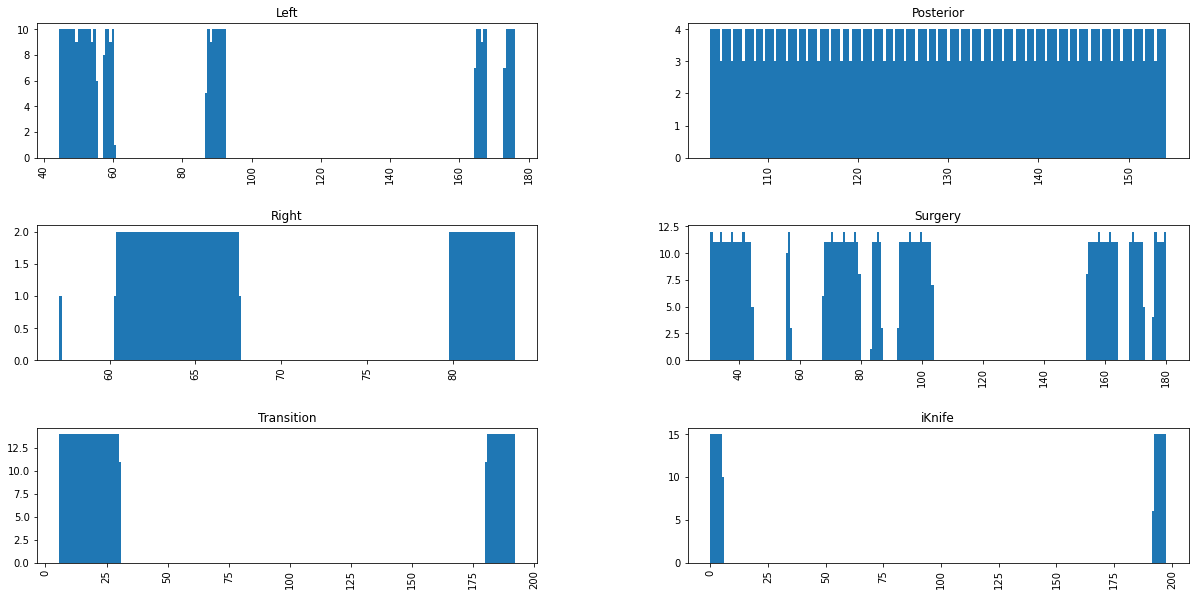

In [51]:
df3.hist(column="Time Recorded", by="Step", bins=200, figsize=(20, 10))

array([<AxesSubplot:title={'center':'0.0'}>,
       <AxesSubplot:title={'center':'1.0'}>], dtype=object)

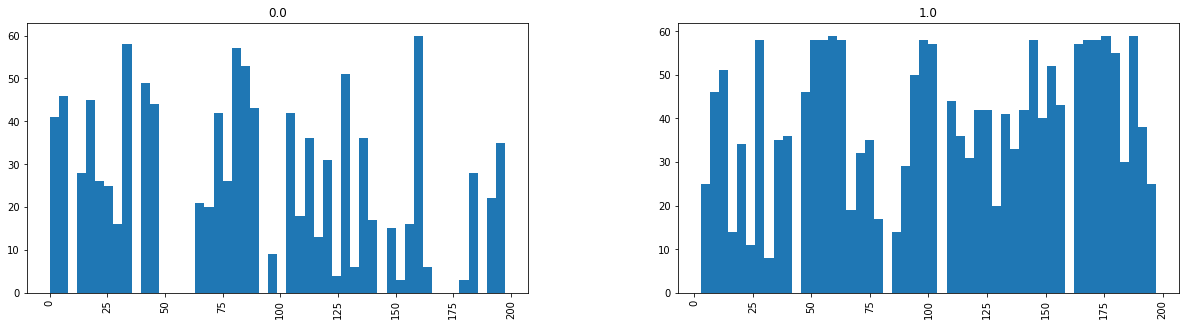

In [56]:
df3.hist(column="Time Recorded", by="Contact", bins=50, figsize=(20, 5))

<AxesSubplot:xlabel='Time Recorded', ylabel='Step'>

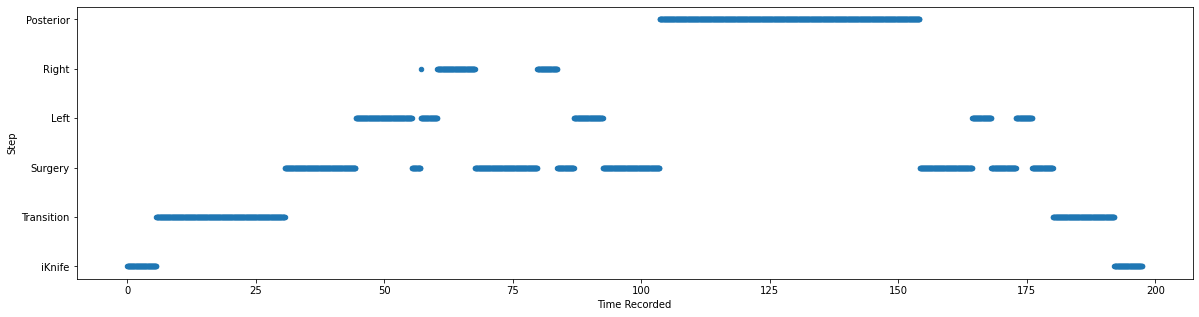

In [59]:
df3.plot.scatter(x='Time Recorded', y='Step', figsize=(20, 5))

<AxesSubplot:xlabel='Time Recorded', ylabel='Contact'>

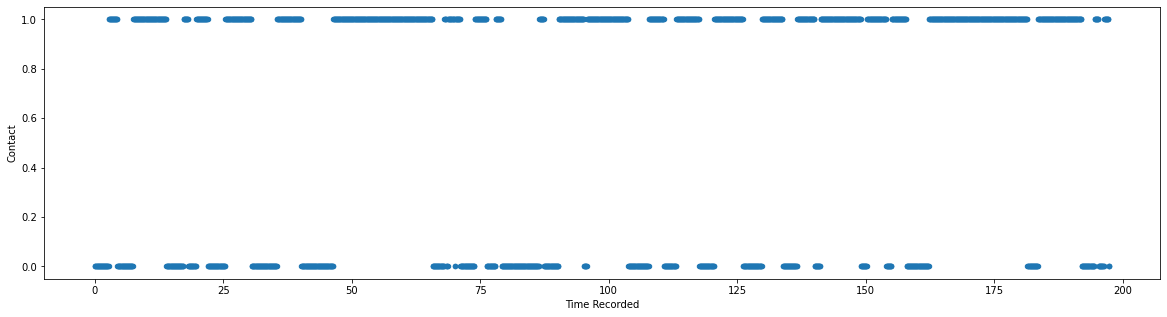

In [60]:
df3.plot.scatter(x='Time Recorded', y='Contact', figsize=(20, 5))

In [33]:
df5 = pd.read_csv(r"C:\Users\Lucas\Video Images\67_test\localization_results_withdist.csv")

array([[<AxesSubplot:title={'center':'None'}>,
        <AxesSubplot:title={'center':'left'}>],
       [<AxesSubplot:title={'center':'lower'}>,
        <AxesSubplot:title={'center':'right'}>],
       [<AxesSubplot:title={'center':'upper'}>, <AxesSubplot:>]],
      dtype=object)

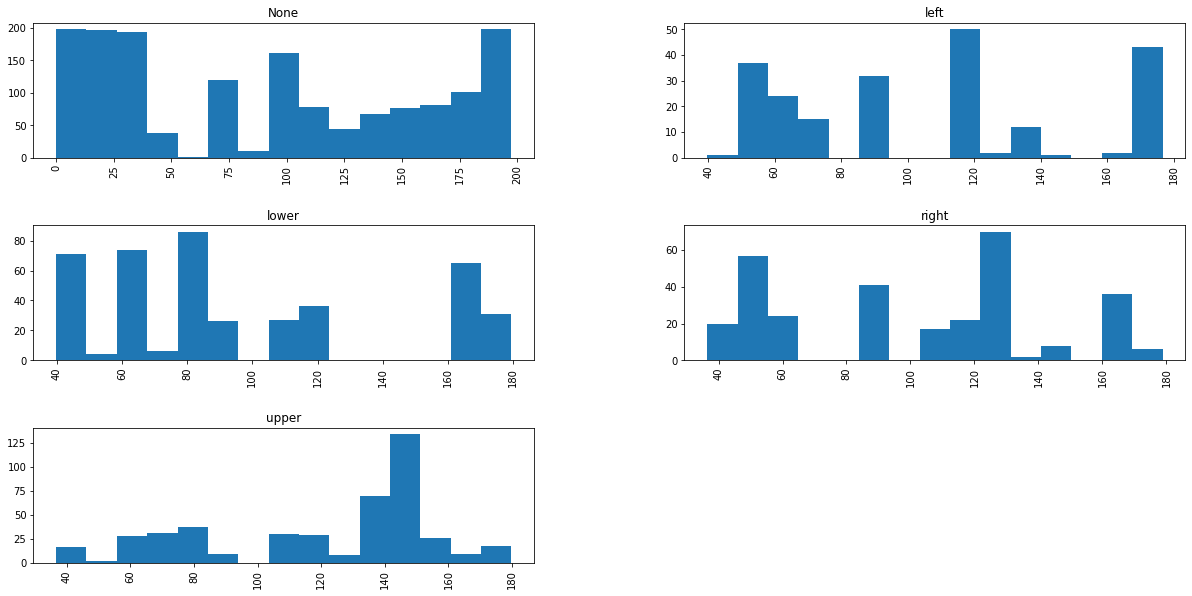

In [84]:
df5.hist(column="time", by="resection margin", bins=15, figsize=(20, 10))

<AxesSubplot:xlabel='time', ylabel='resection margin'>

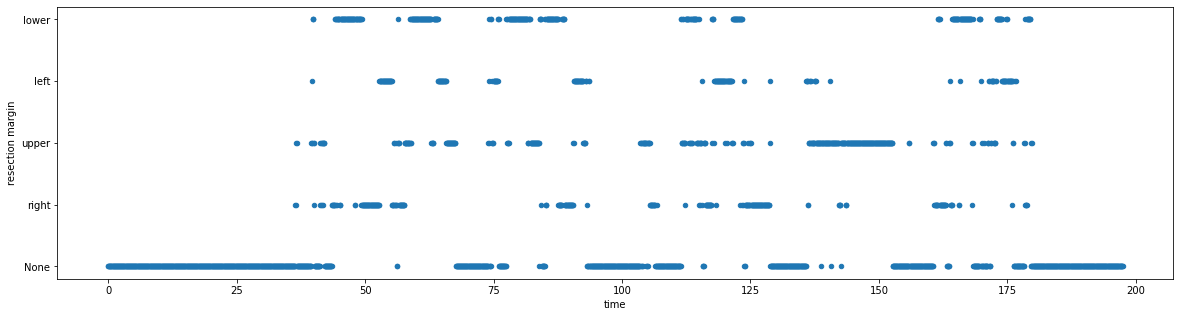

In [45]:
df5.plot.scatter(x='time', y='resection margin', figsize=(20, 5))

In [41]:
df2['Sum.'].size

187

In [46]:
df5['resection margin'].size

2962

In [116]:
stepcsv = pd.read_csv(r"C:\Users\Lucas\dev\aigt\DeepLearnLive\Datasets\Step_Detection.csv")

In [117]:
stepcsv.head()

,Unnamed: 0,Fold,Set,Folder,FileName,Step,Tool bounding box
0,0,0,Train,C:/Users/Lucas/Video Images/Training\GH010020,GH010020@t=0.000.jpg,iKnife,[]
1,1,0,Train,C:/Users/Lucas/Video Images/Training\GH010020,GH010020@t=0.067.jpg,iKnife,[]
2,2,0,Train,C:/Users/Lucas/Video Images/Training\GH010020,GH010020@t=0.133.jpg,iKnife,[]
3,3,0,Train,C:/Users/Lucas/Video Images/Training\GH010020,GH010020@t=0.200.jpg,iKnife,[]
4,4,0,Train,C:/Users/Lucas/Video Images/Training\GH010020,GH010020@t=0.267.jpg,iKnife,[]


In [118]:
stepcsv.loc[(stepcsv["Step"] == "Left") | (stepcsv["Step"] == "Right") | (stepcsv["Step"] == "Posterior"), 'Contact'] = 1
stepcsv.loc[(stepcsv["Step"] == "Surgery") | (stepcsv["Step"] == "iKnife") | (stepcsv["Step"] == "Transition"), 'Contact'] = 0

In [119]:
stepcsv.to_csv(r"C:\Users\Lucas\dev\aigt\DeepLearnLive\Datasets\Step_Detection_Contact.csv")